In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
file_path = '../dataset/citibike_trips_2017_sampled.csv'

In [3]:
df = pd.read_csv(file_path, sep=',')

In [5]:
'''
このデータはサービスのログデータ
tripduration: どのくらい使用したか(秒)
starttime: いつ開始したか
stoptime: いつ終了したか
start_station_id: 開始したステーションのid
start_station_name: ステーション名
start_station_latitude: 緯度
start_station_longitude: 経度
'''
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,dayofweek,age
0,0,1877,2017/4/3 16:51,2017/4/3 17:22,498,Broadway & W 32 St,40.748549,-73.988084,382,University Pl & E 14 St,40.734927,-73.992005,27181,Customer,NaN,unknown,NaN,Mon,NaN
1,1,314,2017/4/11 8:26,2017/4/11 8:31,533,Broadway & W 39 St,40.752996,-73.987216,402,Broadway & E 22 St,40.740343,-73.989551,26081,Subscriber,1992.0,male,NaN,Tue,25.0
2,2,2686,2017/4/15 16:12,2017/4/15 16:56,430,York St & Jay St,40.701485,-73.986569,3125,45 Rd & 11 St,40.747086,-73.949772,28244,Subscriber,1994.0,male,NaN,Sat,25.0
3,3,1494,2017/7/10 15:28,2017/7/10 15:53,3474,6 Ave & Spring St,40.725256,-74.004121,480,W 53 St & 10 Ave,40.766697,-73.990617,28398,Subscriber,1971.0,male,NaN,Mon,45.0
4,4,606,2017/8/22 10:13,2017/8/22 10:23,432,E 7 St & Avenue A,40.726218,-73.983799,438,St Marks Pl & 1 Ave,40.727791,-73.985649,27444,Subscriber,1990.0,female,NaN,Tue,25.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141562 entries, 0 to 141561
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               141562 non-null  int64  
 1   tripduration             141562 non-null  int64  
 2   starttime                141562 non-null  object 
 3   stoptime                 141562 non-null  object 
 4   start_station_id         141562 non-null  int64  
 5   start_station_name       141562 non-null  object 
 6   start_station_latitude   141562 non-null  float64
 7   start_station_longitude  141562 non-null  float64
 8   end_station_id           141562 non-null  int64  
 9   end_station_name         141562 non-null  object 
 10  end_station_latitude     141562 non-null  float64
 11  end_station_longitude    141562 non-null  float64
 12  bikeid                   141562 non-null  int64  
 13  usertype                 141562 non-null  object 
 14  birt

In [7]:
# starttimeとstoptimeをdate型に変換
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141562 entries, 0 to 141561
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               141562 non-null  int64         
 1   tripduration             141562 non-null  int64         
 2   starttime                141562 non-null  datetime64[ns]
 3   stoptime                 141562 non-null  datetime64[ns]
 4   start_station_id         141562 non-null  int64         
 5   start_station_name       141562 non-null  object        
 6   start_station_latitude   141562 non-null  float64       
 7   start_station_longitude  141562 non-null  float64       
 8   end_station_id           141562 non-null  int64         
 9   end_station_name         141562 non-null  object        
 10  end_station_latitude     141562 non-null  float64       
 11  end_station_longitude    141562 non-null  float64       
 12  bikeid          

In [9]:
# 後で月などで集計するため
df['num_trips'] = 1

In [10]:
# tripdurationを秒単位から分単位に変換
df['tripduration_min'] = df['tripduration'] / 60.0

In [11]:
df['month'] = df['starttime'].dt.month
df['day'] = df['starttime'].dt.day
df['date'] = df['starttime'].dt.date
df['hour'] = df['starttime'].dt.hour
# カテゴリカルなdayofweekを数値化(Mon -> 0, Tue -> 1)
df['day_of_week'] = df['starttime'].dt.dayofweek

In [12]:
df

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,customer_plan,dayofweek,age,num_trips,tripduration_min,month,day,date,hour,day_of_week
0,0,1877,2017-04-03 16:51:00,2017-04-03 17:22:00,498,Broadway & W 32 St,40.748549,-73.988084,382,University Pl & E 14 St,...,NaN,Mon,NaN,1,31.283333,4,3,2017-04-03,16,0
1,1,314,2017-04-11 08:26:00,2017-04-11 08:31:00,533,Broadway & W 39 St,40.752996,-73.987216,402,Broadway & E 22 St,...,NaN,Tue,25.0,1,5.233333,4,11,2017-04-11,8,1
2,2,2686,2017-04-15 16:12:00,2017-04-15 16:56:00,430,York St & Jay St,40.701485,-73.986569,3125,45 Rd & 11 St,...,NaN,Sat,25.0,1,44.766667,4,15,2017-04-15,16,5
3,3,1494,2017-07-10 15:28:00,2017-07-10 15:53:00,3474,6 Ave & Spring St,40.725256,-74.004121,480,W 53 St & 10 Ave,...,NaN,Mon,45.0,1,24.900000,7,10,2017-07-10,15,0
4,4,606,2017-08-22 10:13:00,2017-08-22 10:23:00,432,E 7 St & Avenue A,40.726218,-73.983799,438,St Marks Pl & 1 Ave,...,NaN,Tue,25.0,1,10.100000,8,22,2017-08-22,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141557,141557,1488,2017-07-17 21:38:00,2017-07-17 22:03:00,3302,Columbus Ave & W 103 St,40.796935,-73.964341,3302,Columbus Ave & W 103 St,...,NaN,Mon,25.0,1,24.800000,7,17,2017-07-17,21,0
141558,141558,217,2017-05-18 16:35:00,2017-05-18 16:39:00,311,Norfolk St & Broome St,40.717227,-73.988021,502,Henry St & Grand St,...,NaN,Thr,55.0,1,3.616667,5,18,2017-05-18,16,3
141559,141559,1138,2017-07-06 06:47:00,2017-07-06 07:06:00,3236,W 42 St & Dyer Ave,40.758985,-73.993800,444,Broadway & W 24 St,...,NaN,Thr,40.0,1,18.966667,7,6,2017-07-06,6,3
141560,141560,955,2017-05-17 08:13:00,2017-05-17 08:29:00,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,327,Vesey Pl & River Terrace,...,NaN,Wed,60.0,1,15.916667,5,17,2017-05-17,8,2


### 月別の利用者数

In [19]:
num_trips_df = df.groupby('month')['num_trips'].count().reset_index()

In [20]:
num_trips_df

,month,num_trips
0,4,13264
1,5,15276
2,6,17406
3,7,17528
4,8,18073
5,9,18762
6,10,18881
7,11,13350
8,12,9022


In [21]:
px.line(num_trips_df, x='month', y='num_trips', markers=True, width=800, height=600)

### station別の分析

In [22]:
station_df = df.groupby('start_station_id')['num_trips'].count().reset_index()

In [23]:
station_df

,start_station_id,num_trips
0,72,335
1,79,247
2,82,79
3,83,140
4,116,329
...,...,...
767,3644,9
768,3646,1
769,3647,1
770,3648,5


In [28]:
# 上から10番目までのstationを分析
# ascending=Falseで昇順
top10_stations = station_df.sort_values(by='num_trips', ascending=False).head(10)['start_station_id']
# top10_stations = station_df.sort_values(by='num_trips', ascending=False)

In [29]:
top10_stations

268     519
187     426
249     497
167     402
194     435
448    3255
243     490
216     459
263     514
271     523
Name: start_station_id, dtype: int64

In [30]:
# トップ10のstationに対して、曜日ごとの推移
num_trips_df = df.groupby(['start_station_id', 'day_of_week'])['num_trips'].count().reset_index()
query = 'start_station_id in @top10_stations'
px.line(num_trips_df.query(query), x='day_of_week', y='num_trips', color='start_station_id', width=800, height=600)

### 利用者数を時間帯別に分析

In [31]:
px.histogram(df, x='hour', facet_col='dayofweek')

In [32]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,customer_plan,dayofweek,age,num_trips,tripduration_min,month,day,date,hour,day_of_week
0,0,1877,2017-04-03 16:51:00,2017-04-03 17:22:00,498,Broadway & W 32 St,40.748549,-73.988084,382,University Pl & E 14 St,...,NaN,Mon,NaN,1,31.283333,4,3,2017-04-03,16,0
1,1,314,2017-04-11 08:26:00,2017-04-11 08:31:00,533,Broadway & W 39 St,40.752996,-73.987216,402,Broadway & E 22 St,...,NaN,Tue,25.0,1,5.233333,4,11,2017-04-11,8,1
2,2,2686,2017-04-15 16:12:00,2017-04-15 16:56:00,430,York St & Jay St,40.701485,-73.986569,3125,45 Rd & 11 St,...,NaN,Sat,25.0,1,44.766667,4,15,2017-04-15,16,5
3,3,1494,2017-07-10 15:28:00,2017-07-10 15:53:00,3474,6 Ave & Spring St,40.725256,-74.004121,480,W 53 St & 10 Ave,...,NaN,Mon,45.0,1,24.900000,7,10,2017-07-10,15,0
4,4,606,2017-08-22 10:13:00,2017-08-22 10:23:00,432,E 7 St & Avenue A,40.726218,-73.983799,438,St Marks Pl & 1 Ave,...,NaN,Tue,25.0,1,10.100000,8,22,2017-08-22,10,1


In [33]:
df.columns

Index(['Unnamed: 0', 'tripduration', 'starttime', 'stoptime',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'customer_plan', 'dayofweek', 'age',
       'num_trips', 'tripduration_min', 'month', 'day', 'date', 'hour',
       'day_of_week'],
      dtype='object')

In [34]:
px.histogram(df, x='hour', facet_col='dayofweek', facet_row='usertype')

### デモグラフ分析(年齢と性別)

In [35]:
demogra_pivot = pd.pivot_table(df, index='age', columns='gender', 
                               values='num_trips', aggfunc='sum').fillna(0)

In [36]:
demogra_pivot

gender,female,male,unknown
age,,,
15.0,50.0,219.0,5.0
20.0,1281.0,3106.0,42.0
25.0,6284.0,14270.0,74.0
30.0,7471.0,18968.0,92.0
35.0,4955.0,15366.0,133.0
40.0,3052.0,11065.0,79.0
45.0,2677.0,9264.0,42.0
50.0,2504.0,7661.0,64.0
55.0,1998.0,6283.0,22.0


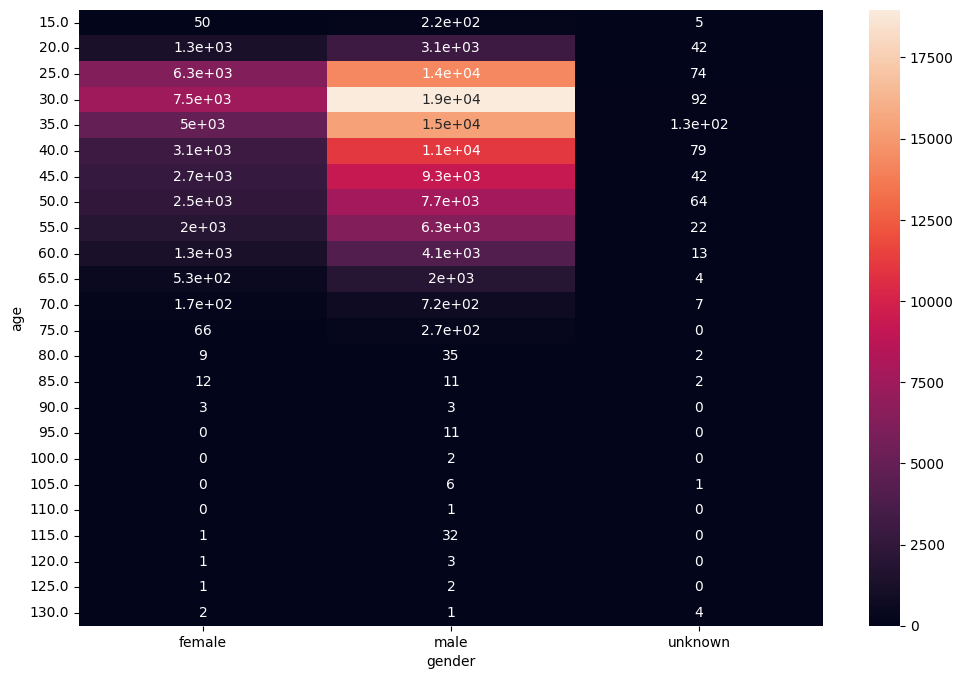

In [41]:
fig = plt.figure(figsize=(12, 8))
fig = sns.heatmap(demogra_pivot, annot=True)